1. What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?
   - Fundamental Idea Behind Ensemble Techniques:
      - The fundamental idea behind ensemble techniques is to combine the predictions of multiple models to produce a single, stronger model that performs better than any individual one. Instead of relying on a single learning algorithm, ensemble methods bring together many models (often called weak learners) to reduce prediction errors, improve accuracy, and enhance generalization. The principle is that a group of diverse models, when combined wisely, can outperform any single model on its own.
      - Ensemble techniques help in reducing bias,variance, or both, depending on the method used. The most common ensemble methods are Bagging, Boosting and Stacking.
   - Bagging vs. Boosting: Although both bagging and boosting are ensemble methods, they differ in how they build and combine their models.
      - Bagging (Bootstrap Aggregating) works by creating multiple subsets of the original dataset through random sampling with replacement. Each subset is used to train an independent model (for example, a decision tree). Since the models are trained separately and in parallel, their predictions are independent. After training, the results from all models are combined — usually by averaging in regression problems or by majority voting in classification problems. The main goal of bagging is to reduce variance and make the model more stable and less sensitive to noise in the data. A classic example of a bagging method is the Random Forest algorithm.
      - Boosting, on the other hand, builds models sequentially rather than in parallel. Each new model is trained to correct the errors made by the previous models. In boosting, more importance (or weight) is given to the data points that were misclassified by earlier models, so that the next model focuses on getting those right. The final prediction is a weighted combination of all the models' outputs. The main objective of boosting is to reduce bias and improve prediction accuracy. Common boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.
      - In Summary: Bagging focuses on stability by reducing variance through averaging independent models, while boosting focuses on accuracy by reducing bias through sequential learning.
      - In simple terms: Bagging means “train many independent models and combine their results.” Boosting means “train models one after another, each learning from the previous one's mistakes.”

2. Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.
   - A single decision tree often tends to overfit the training data because it keeps splitting until it perfectly classifies all training examples, even the noisy or irrelevant ones. This leads to high accuracy on the training data but poor performance on unseen data.

     The Random Forest Classifier helps overcome this problem by creating an ensemble of multiple decision trees and combining their predictions. Each tree is trained on a slightly different version of the dataset and considers only a random subset of features when splitting. As a result, the trees are less correlated, and their combined output is more stable and generalized.

     By averaging (for regression) or taking a majority vote (for classification) across many trees, random forest reduces the effect of any single overfitted tree. This ensemble approach smooths out noise and reduces variance — the main cause of overfitting in single trees.

   - How Random Forest Reduces Overfitting:
      - Random Sampling of Data (Bootstrap Sampling): Each tree is trained on a different random subset of the training data, selected with replacement. This introduces variability among the trees so that not all trees see the same data points. Some trees might miss certain samples or focus on different ones, which reduces the chance that all trees overfit the same patterns.
      - Random Feature Selection: At every split in a tree, Random Forest considers only a random subset of features rather than all features. This prevents dominant or highly correlated features from influencing all the trees in the same way, again promoting diversity among the models.

     Both of these randomness elements (data and feature randomness) ensure that individual trees make different errors, which cancel out when averaged, leading to lower overfitting.
    
   - Key Hyperparameters and Their Role:
      - n_estimators (Number of Trees): This controls how many decision trees are built in the forest. Increasing the number of trees generally improves performance and reduces overfitting because averaging over more models smooths out noise. However, after a certain point, adding more trees gives diminishing returns and increases computation time.
      - max_features (Number of Features Considered for Each Split): This controls how many features are randomly selected for splitting at each node. A smaller number of features increases the diversity between trees and helps reduce overfitting. If too many features are used, trees may become too similar and lose this benefit.
   - In Summary: A single decision tree tends to memorize training data, while a random forest builds many diverse trees and combines their predictions to produce a model that is both accurate and resistant to overfitting. The number of trees (n_estimators) and the number of features used per split (max_features)play a key role in controlling this balance between bias, variance, and overfitting.

3. What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.
   - What is Stacking?:
      - Stacking (Stacked Generalization) is an advanced ensemble learning technique that combines predictions from multiple different models (called base learners) using another model (called a meta-learner or blender) to make the final prediction.
      - Instead of simply averaging or voting like in bagging or boosting, stacking learns how to best combine the outputs of several diverse models. The idea is that different algorithms may capture different patterns in the data, and the meta-learner can learn how to weight or blend their strengths for optimal performance.
   - How Stacking Works (Step-by-Step):
      - Train multiple base models (e.g., Logistic Regression, Decision Tree, SVM, Random Forest) on the training dataset.
      - Generate predictions from these base models — these predictions are treated as new features.
      - Train a meta-model (e.g., Linear Regression or another ML algorithm) on these predictions to learn how to best combine them.
      - The meta-model outputs the final prediction.
   - In short: Base models → generate predictions → meta-model learns how to combine them.
   - How Stacking Differs from Bagging and Boosting, While all three are ensemble methods, their approaches are quite different:
      - Bagging trains multiple models of the same type independently (usually on different random samples) and combines them by averaging or voting. Goal: Reduce variance and overfitting. Example: Random Forest (many decision trees trained in parallel).
      - Boosting trains models sequentially, where each new model focuses on correcting the errors of the previous ones. Goal: Reduce bias and improve accuracy. Example: AdaBoost, Gradient Boosting.
      - Stacking, unlike both, combines different types of models and uses a meta-model to learn how to best combine their outputs instead of using simple averaging or weighting. Goal: Combine diverse model strengths for better overall generalization.
   - Simple Example Use Case, Suppose you are predicting whether a loan applicant will default. You could use:
      - A Logistic Regression model (captures linear relationships), A Decision Tree (captures non-linear patterns), A K-Nearest Neighbors model (captures local similarities).

     Each of these models makes its own prediction (e.g., probability of default). You then train a meta-model, say a Random Forest, on these predicted probabilities to learn how to best combine them.

     The final output of the stacking model would likely outperform any single model because it uses the strengths of all three.
   - In Summary:
      - Stacking = combining predictions from different models using a meta-learner. Bagging = combining predictions from many versions of the same model trained in parallel. Boosting = combining sequential models that learn from each other's mistakes.

4. What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?
   - What is the OOB Score?
      - The OOB (Out-of-Bag) Score is an internal validation metric used in the Random Forest algorithm to estimate its prediction accuracy without needing a separate validation or test dataset.
      - When building each decision tree in a random forest, the algorithm uses bootstrap sampling — meaning it randomly selects data points with replacement to train that tree. Because of this, roughly one-third of the data is left out (not selected) for training each tree. These unused samples are called the out-of-bag samples for that tree.
   - How the OOB Score Works:
      - Each tree in the forest is trained on a random subset of the data (about two-thirds of the total samples).
      - The remaining one-third of samples (the OOB samples) are not used to train that tree.
      - Once the tree is built, it makes predictions for its OOB samples.
      - The random forest aggregates these OOB predictions across all trees (since each sample is “out-of-bag” for some subset of trees).
      - The overall accuracy (or error rate) computed from these predictions is the OOB Score.
   - Why the OOB Score is Useful? - The OOB score provides an unbiased estimate of model performance because it is based only on samples that each tree has never seen during training. This means:
      - You don't need to hold out a separate validation set.
      - You can use all your data for training, yet still get a reliable estimate of how well the model generalizes.
      - It helps detect overfitting early, since the score reflects performance on unseen data.
   - How It Helps in Model Evaluation: - Instead of splitting the dataset into training and testing parts, the OOB score acts as an internal cross-validation. For example:
      - If the OOB score is high, it means the model performs well on unseen data.
      - If the OOB score is much lower than the training accuracy, it suggests the model may be overfitting.
   - In scikit-learn, you can enable it easily using:
             
           from sklearn.ensemble import RandomForestClassifier
           model = RandomForestClassifier(oob_score=True)
           model.fit(X, y)
           print(model.oob_score_)

   - In Summary:
      - OOB Score = Accuracy (or error rate) computed using the out-of-bag samples (data not seen by a tree during training). Purpose = To evaluate model performance without needing a separate validation set. Benefit = Saves data, gives an unbiased accuracy estimate, and helps monitor overfitting internally.

5. Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases
   1. How They Handle Errors from Weak Learners:
   - Both AdaBoost and Gradient Boosting are boosting algorithms, meaning they build models sequentially, where each new model tries to correct the errors made by the previous ones. However, they differ in how they handle those errors.
      - AdaBoost (Adaptive Boosting): AdaBoost focuses more on **misclassified samples from the previous model. After each iteration, it increases the weights of the incorrectly classified samples, forcing the next weak learner to pay more attention to those difficult cases. Thus, the next model tries harder to get those specific samples right.
      - Gradient Boosting: Gradient Boosting handles errors by fitting the next model to the residual errors (the difference between actual and predicted values) of the previous model. Instead of adjusting sample weights directly, it uses gradient descent to minimize the loss function — meaning it learns in the direction that most reduces the overall prediction error.

   2. Weight Adjustment Mechanism:
     
   - AdaBoost: Each training sample has a *weight. Initially, all samples have equal weight. After each weak learner is trained:
      - Misclassified samples get higher weights, so they are emphasized in the next iteration.
      - Correctly classified samples get lower weights. The model's contribution to the final prediction depends on its accuracy — better-performing models get higher weights in the final ensemble.
   - Gradient Boosting: It doesn't use explicit sample weights. Instead, it computes gradients of the loss function to determine how much correction is needed. Each new model is trained to predict these gradients (residuals), and a learning rate (shrinkage factor) controls how much influence each new model has on the final prediction. In short, Gradient Boosting optimizes model weights through gradient descent on the loss function, rather than reweighting samples.

   3. Typical Use Cases:
   - AdaBoost:
      - Works well with simple base learners like shallow decision trees (called stumps).
      - Performs well on clean, less noisy datasets where the data is relatively well-behaved.
      - Commonly used for binary classification problems, e.g., spam detection, fraud detection, face recognition.
   - Gradient Boosting:
      - Suitable for both regression and classification tasks.
      - Handles complex relationships and noisy data better than AdaBoost.
      - Often used in real-world predictive modeling, such as customer churn prediction, sales forecasting, and credit scoring.
      - Advanced implementations like XGBoost, LightGBM, and CatBoost are built upon the Gradient Boosting framework for better speed and performance.
   - In Summary:
      - AdaBoost focuses on reweighting misclassified samples, making future models pay more attention to hard cases.
      - Gradient Boosting focuses on minimizing the residual errors through gradient descent.
      - AdaBoost is simpler and effective on smaller, cleaner datasets, while Gradient Boosting is more flexible, powerful, and widely used in modern machine learning applications.

6. Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.
   - CatBoost (short for Categorical Boosting) is a gradient boosting algorithm developed by Yandex that is designed to handle categorical features efficiently and automatically. Unlike other algorithms such as XGBoost or LightGBM, which require manual encoding (like one-hot or label encoding), CatBoost can natively process categorical data without extensive preprocessing.
    
     This makes it especially useful for datasets with many categorical variables (like customer type, city, or product category).

   - Why CatBoost Performs Well on Categorical Features:
      - CatBoost performs well because it uses a unique encoding strategy that converts categorical variables into meaningful numerical representations based on statistics rather than arbitrary labels. This reduces information loss and overfitting that can occur with traditional encodings.
   - How CatBoost Handles Categorical Variables:
      - Target-Based Encoding (but with a twist): Instead of replacing a categorical value with simple label or one-hot encoding, CatBoost replaces each category with an average value of the target variable for that category. For example, if predicting loan default, the category “Student” might be replaced with the average default rate among students.
      - Ordered Target Statistics: A key innovation in CatBoost is how it avoids target leakage (using future information during training).
         - It processes data in a randomized order, and for each row, it computes the average target only using previous examples of the same category.
         - This ensures the model doesn't accidentally use information from the future, which would cause overfitting.
      - Efficient Handling of High-Cardinality Features: CatBoost uses combinations of categorical features and applies statistical transformations to them, capturing interactions automatically without exploding feature dimensions (as would happen with one-hot encoding).
      - Built-in Encoding + Boosting Integration: The encoding process is tightly integrated into the boosting framework. This means it adjusts and learns these encodings dynamically as trees are built, leading to more accurate splits and better model generalization.
   - In Summary, CatBoost performs well on categorical features because it:
      - Automatically converts categorical values into numerical ones using target-based statistics,
      - Prevents target leakage through ordered encoding, and
      - Captures complex category interactions without requiring manual preprocessing like one-hot encoding.
     
     As a result, it saves time, reduces preprocessing effort, and delivers strong performance on datasets rich in categorical variables.

7. KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
   1. Load the Wine dataset (sklearn.datasets.load_wine()).
   2. Split data into 70% train and 30% test.
   3. Train a KNN classifier (default K=5) without scaling and evaluate using:
      a. Accuracy
      b. Precision, Recall, F1-Score (print classification report)
   4. Apply StandardScaler, retrain KNN, and compare metrics.
   5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
        (Euclidean, Manhattan).
   6. Train the optimized KNN and compare results with the unscaled/scaled versions.

In [ ]:
#answer in code to ques. no. 7

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Load the dataset
wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
# Initialize KNN with default K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate performance
print("Without Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN again (K=5)
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluate performance after scaling
print("\nAfter Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_scaled))
# Define parameter grid
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'
)

# Fit on scaled data
grid_search.fit(X_train_scaled, y_train)

# Display best parameters and score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate best model on test data
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("\nFinal Model Performance on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

Without Scaling:
Accuracy: 0.7222222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


After Scaling:
Accuracy: 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11}
Best Cross-Validation Accuracy: 0.97

8. PCA + KNN with Variance Analysis and Visualization
Task:
   1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
   2. Apply PCA and plot the scree plot (explained variance ratio).
   3. Retain 95% variance and transform the dataset.
   4. Train KNN on the original data and PCA-transformed data, then compare
      accuracy.
   5. Visualize the first two principal components using a scatter plot (color by class).

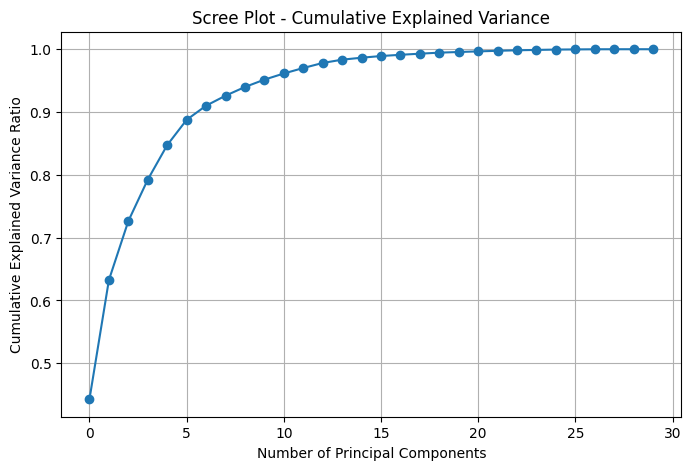

Number of components retained: 10
Accuracy (Original Data): 0.9591
Accuracy (PCA Data, 95% variance): 0.9591


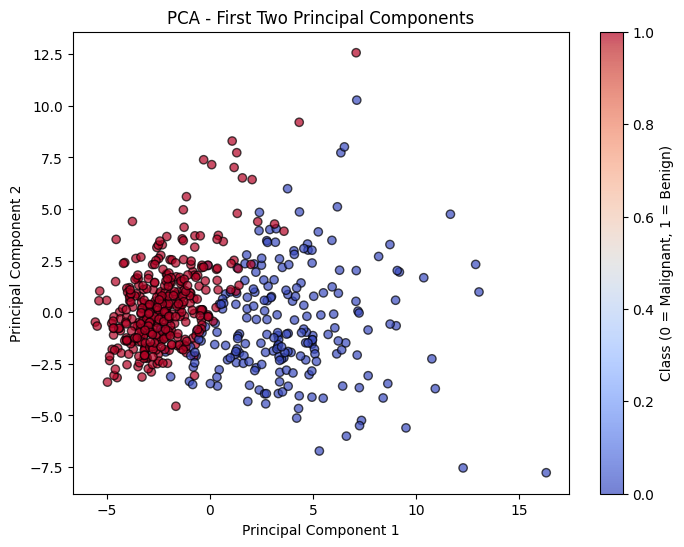

In [ ]:
#answer in code to ques. no. 8

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train and test (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Scree plot (variance explained by each component)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Scree Plot - Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.grid(True)
plt.show()
# Retain components that explain 95% of variance
pca_95 = PCA(0.95)
X_pca = pca_95.fit_transform(X_scaled)

print(f"Number of components retained: {pca_95.n_components_}")
# --- Train KNN on Original Scaled Data ---
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train_scaled, y_train)
y_pred_original = knn_original.predict(X_test_scaled)
acc_original = accuracy_score(y_test, y_pred_original)

# --- Train KNN on PCA-Transformed Data ---
# Apply same PCA transformation to train/test sets
X_train_pca = pca_95.transform(X_train_scaled)
X_test_pca = pca_95.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy (Original Data): {acc_original:.4f}")
print(f"Accuracy (PCA Data, 95% variance): {acc_pca:.4f}")
# Take first two principal components
X_pca_2d = pca.transform(X_scaled)[:, :2]

plt.figure(figsize=(8,6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
            c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("PCA - First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Class (0 = Malignant, 1 = Benign)')
plt.show()

9. KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
    1. Generate a synthetic regression dataset
       (sklearn.datasets.make_regression(n_samples=500, n_features=10)).
    2. Train a KNN regressor with:
        a. Euclidean distance (K=5)
        b. Manhattan distance (K=5)
        c. Compare Mean Squared Error (MSE) for both.
    3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

MSE (Euclidean, K=5): 4989.2901
MSE (Manhattan, K=5): 5558.4380


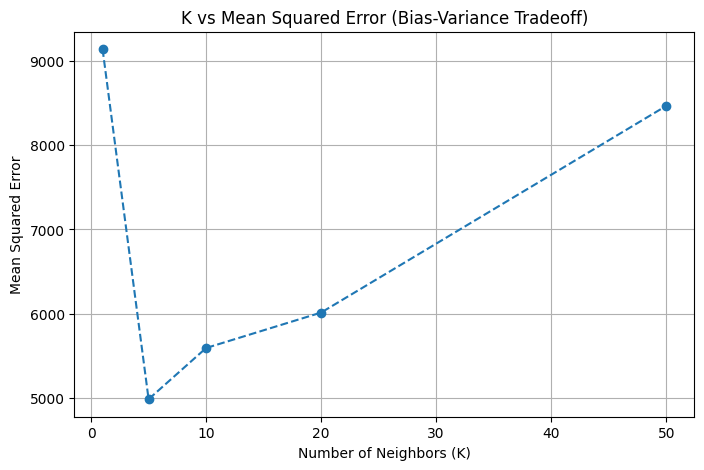

K=1: MSE=9133.66
K=5: MSE=4989.29
K=10: MSE=5595.77
K=20: MSE=6015.53
K=50: MSE=8462.57


In [ ]:
#answer in code to ques. no. 9

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=15, random_state=42)

# Split into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features for distance-based models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# (a) Euclidean Distance (default metric)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# (b) Manhattan Distance
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print(f"MSE (Euclidean, K=5): {mse_euclidean:.4f}")
print(f"MSE (Manhattan, K=5): {mse_manhattan:.4f}")
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot K vs MSE
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_values, marker='o', linestyle='--')
plt.title("K vs Mean Squared Error (Bias-Variance Tradeoff)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

for k, mse in zip(k_values, mse_values):
    print(f"K={k}: MSE={mse:.2f}")


#>Step 4: Interpretation — Bias-Variance Tradeoff
#>Small K (e.g., K=1):

#>Low bias, high variance

#>Model fits noise and may overfit

#>Low MSE on training but higher on unseen data

#>Large K (e.g., K=50):

#>High bias, low variance

#>Predictions become smoother, may underfit

#>MSE increases as local detail is lost

#>Optimal K is usually a small-to-moderate value (e.g., around 5–10)

10.  KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
     1. Load the Pima Indians Diabetes dataset (contains missing values).
     2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
     3. Train KNN using:
         a. Brute-force method
         b. KD-Tree
         c. Ball Tree
     4. Compare their training time and accuracy.
     5. Plot the decision boundary for the best-performing method (use 2 most important features).

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing-like values (0s in key columns):
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outco

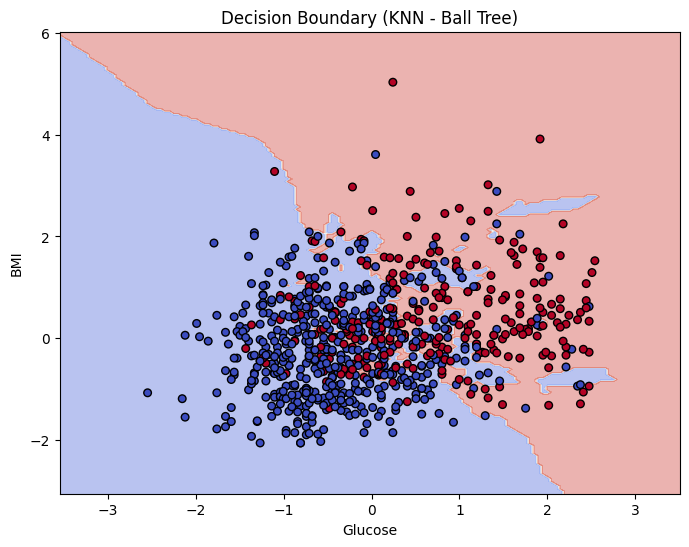

In [ ]:
#answer in code to ques. no. 10

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv(url, names=cols)

print(df.head())
print("\nMissing-like values (0s in key columns):")
print((df == 0).sum())
# Replace 0s with NaN for medically impossible values
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

# Apply KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Verify no missing values
print("\nMissing values after imputation:")
print(df_imputed.isna().sum())
# Split into features and target
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
results = {}

for algo in ['brute', 'kd_tree', 'ball_tree']:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start = time.time()
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    end = time.time()

    acc = accuracy_score(y_test, y_pred)
    duration = end - start

    results[algo] = {'Accuracy': acc, 'Time (s)': duration}

# Display results
print("\n=== KNN Algorithm Comparison ===")
for algo, metrics in results.items():
    print(f"{algo.capitalize()}: Accuracy = {metrics['Accuracy']:.4f}, Time = {metrics['Time (s)']:.4f} sec")
# Choose top 2 important features
feature1 = 'Glucose'
feature2 = 'BMI'

X_vis = df_imputed[[feature1, feature2]]
y_vis = df_imputed['Outcome']

# Scale
X_vis_scaled = scaler.fit_transform(X_vis)

# Train KNN on 2D data
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn_best.fit(X_vis_scaled, y_vis)

# Create meshgrid
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predict across grid
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.4)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis, cmap='coolwarm', edgecolor='k', s=30)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Decision Boundary (KNN - Ball Tree)")
plt.show()